## Libraries

In [54]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GridSearchCV
# Models (some libraries are used to model selection process)
"""
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
"""

'\nfrom sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier\nfrom sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor\nfrom sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier\nfrom xgboost import XGBRegressor, XGBClassifier\nfrom lightgbm import LGBMRegressor, LGBMClassifier\nfrom sklearn.svm import SVC\nfrom sklearn.naive_bayes import GaussianNB\n'

In [55]:
np.random.seed(42)
random.seed(42)

##Load dataset

In [56]:
root_dir = ""

# Checking if our specified directory exists
os.path.exists(root_dir)

False

In [57]:
# read csv file
df = pd.read_csv(f"./survey_lung_cancer.csv")
print(df)

    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2         2       

In [58]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


##missing value check

In [59]:
# check the number of missing values for each column
missing_values = df.isnull().sum()

# ouput only columns with missing values
missing_values = missing_values[missing_values > 0]

print(missing_values)
# Check that there are no missing values ​​in the print result

Series([], dtype: int64)


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

##Data distribution

In [61]:
# numerical variable
numerical = ['AGE']

# categorical variable
categorical = [
    'GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
    'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
    'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
    'SWALLOWING DIFFICULTY', 'CHEST PAIN'
]
target = 'LUNG_CANCER'

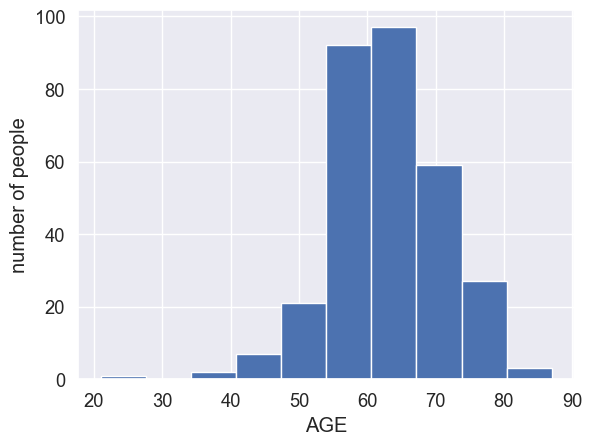

In [62]:
#look at numerical data distribution
for i in df[numerical].columns:
    plt.hist(df[numerical][i])
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('number of people')
    plt.show()

C:\Users\jin89\AppData\Local\Temp\ipykernel_131060\1340228694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=sns.color_palette("Set2", n_colors=len(value_counts)))


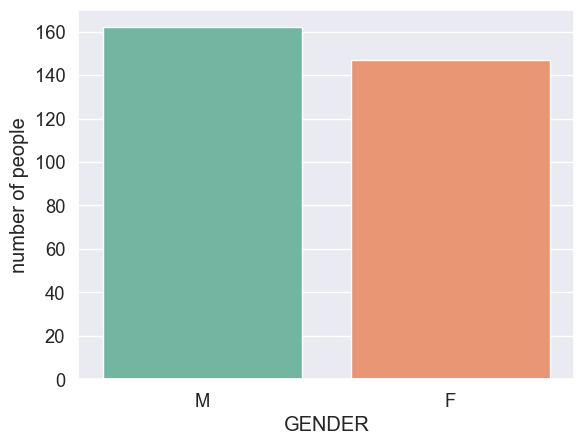

C:\Users\jin89\AppData\Local\Temp\ipykernel_131060\1340228694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=sns.color_palette("Set2", n_colors=len(value_counts)))


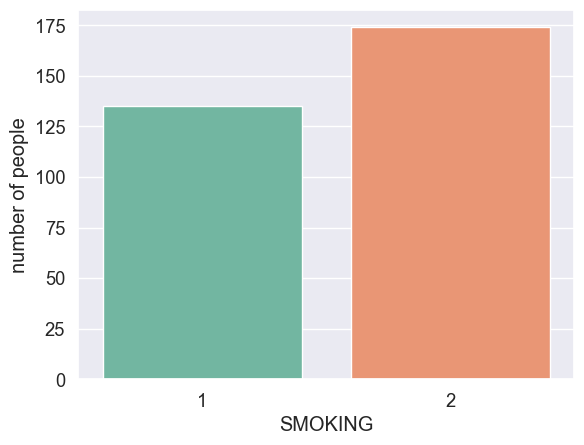

C:\Users\jin89\AppData\Local\Temp\ipykernel_131060\1340228694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=sns.color_palette("Set2", n_colors=len(value_counts)))


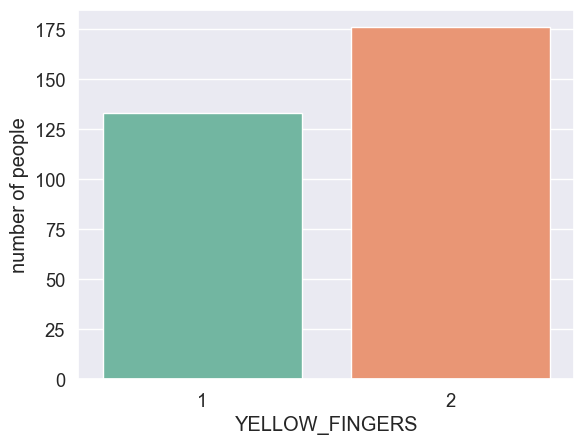

C:\Users\jin89\AppData\Local\Temp\ipykernel_131060\1340228694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=sns.color_palette("Set2", n_colors=len(value_counts)))


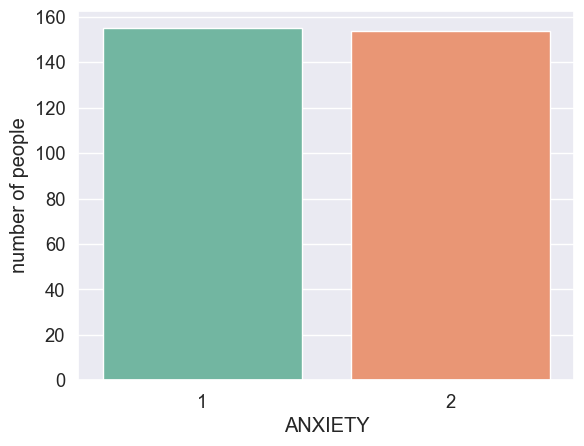

C:\Users\jin89\AppData\Local\Temp\ipykernel_131060\1340228694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=sns.color_palette("Set2", n_colors=len(value_counts)))


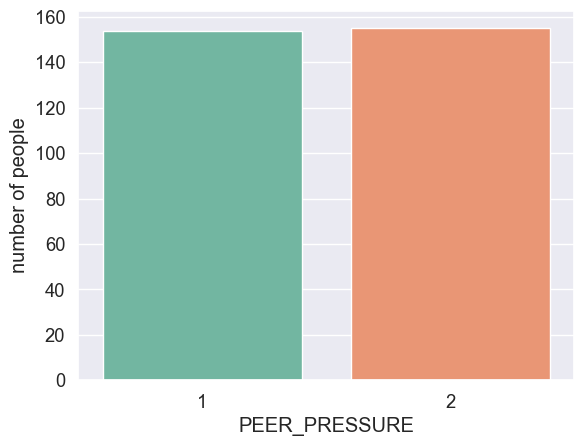

C:\Users\jin89\AppData\Local\Temp\ipykernel_131060\1340228694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=sns.color_palette("Set2", n_colors=len(value_counts)))


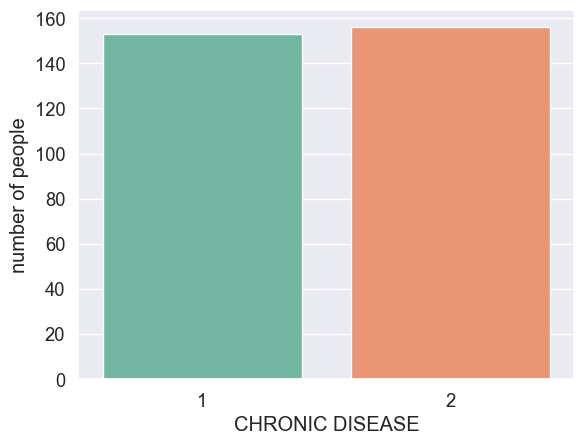

C:\Users\jin89\AppData\Local\Temp\ipykernel_131060\1340228694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=sns.color_palette("Set2", n_colors=len(value_counts)))


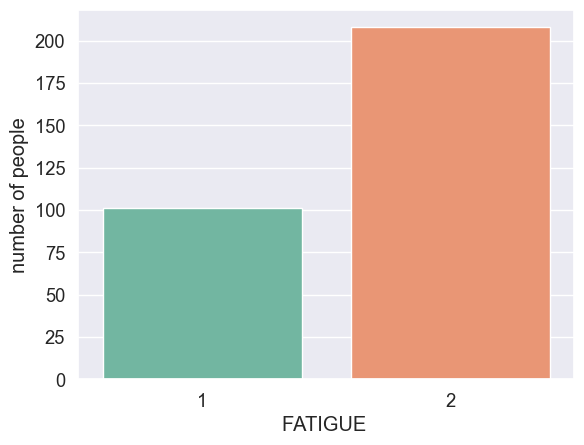

C:\Users\jin89\AppData\Local\Temp\ipykernel_131060\1340228694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=sns.color_palette("Set2", n_colors=len(value_counts)))


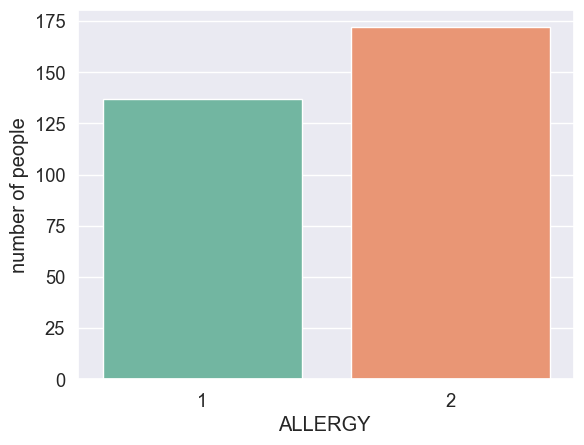

C:\Users\jin89\AppData\Local\Temp\ipykernel_131060\1340228694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=sns.color_palette("Set2", n_colors=len(value_counts)))


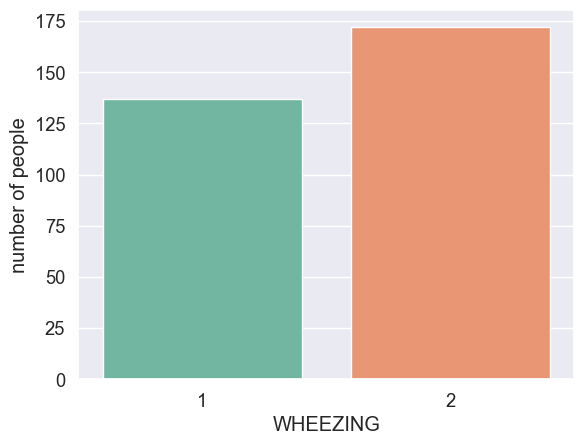

C:\Users\jin89\AppData\Local\Temp\ipykernel_131060\1340228694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=sns.color_palette("Set2", n_colors=len(value_counts)))


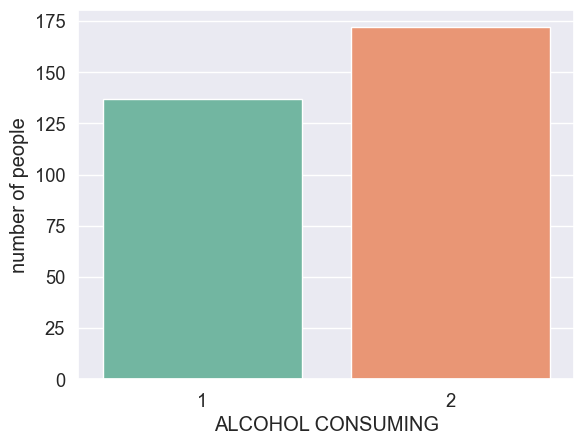

C:\Users\jin89\AppData\Local\Temp\ipykernel_131060\1340228694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=sns.color_palette("Set2", n_colors=len(value_counts)))


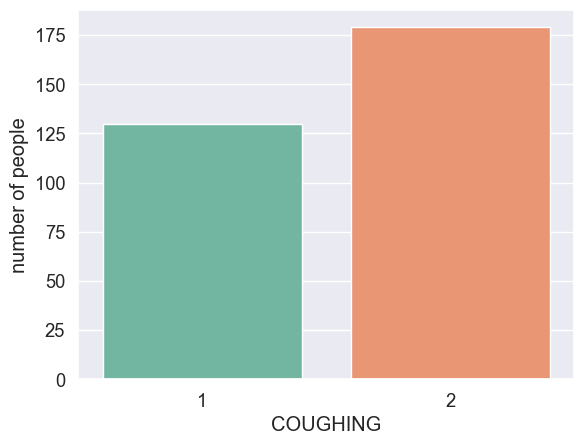

C:\Users\jin89\AppData\Local\Temp\ipykernel_131060\1340228694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=sns.color_palette("Set2", n_colors=len(value_counts)))


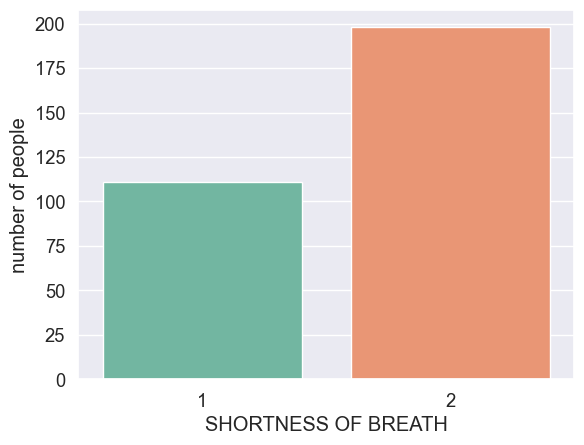

C:\Users\jin89\AppData\Local\Temp\ipykernel_131060\1340228694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=sns.color_palette("Set2", n_colors=len(value_counts)))


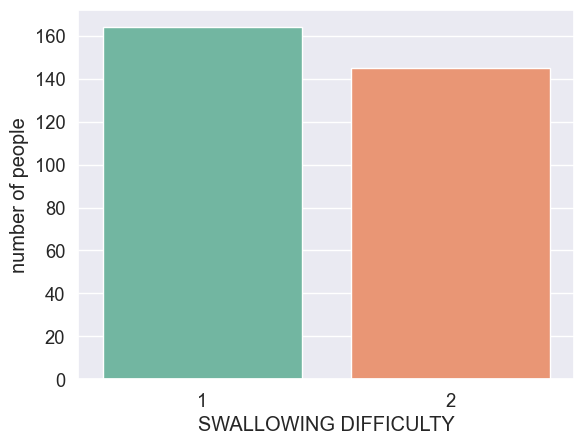

C:\Users\jin89\AppData\Local\Temp\ipykernel_131060\1340228694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=sns.color_palette("Set2", n_colors=len(value_counts)))


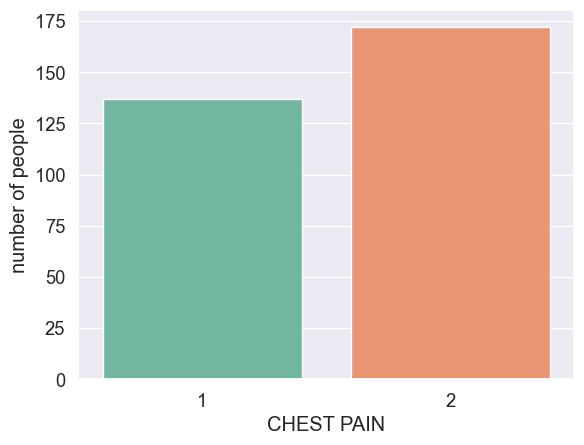

In [63]:
#look at categorical data distribution except target
for idx, i in enumerate(df[categorical].columns):
    value_counts = df[categorical][i].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, palette=sns.color_palette("Set2", n_colors=len(value_counts)))
    plt.xlabel(i)
    plt.ylabel('number of people')
    plt.show()

C:\Users\jin89\AppData\Local\Temp\ipykernel_131060\2184252331.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_target.index, y=value_counts_target.values, palette=sns.color_palette("Set2", n_colors=len(value_counts_target)))


Text(0.5, 0, 'LUNG_CANCER')

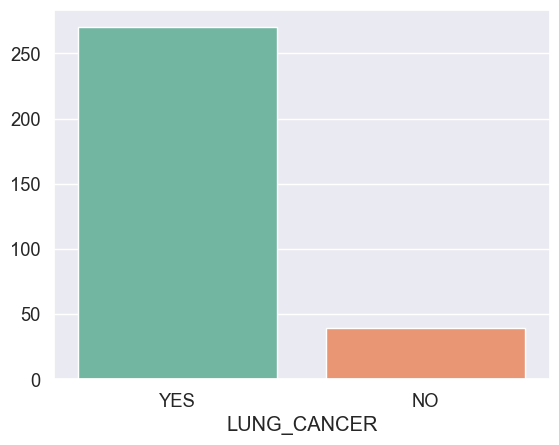

In [64]:
# target class distribution
value_counts_target = df[target].value_counts()
sns.barplot(x=value_counts_target.index, y=value_counts_target.values, palette=sns.color_palette("Set2", n_colors=len(value_counts_target)))
plt.xlabel(target)

## Transform the values

- GENDER : M / F or M / W => 0 / 1
- LUNG_CANCER :	YES / NO => 1 / 0
- Other binary variables	YES / NO => 1 / 0

In [65]:
# change the type of the valued ; string -> int not label encoding
#df.columns = [col.strip() for col in df.columns]  # remove empty space

# except fot AGE, GENDER, LUNG_CANCER columns, dealing with the rest columns
binary_cols = [col for col in df.columns if col not in ['AGE', 'GENDER', 'LUNG_CANCER']]

# transform the values ; 1(=NO), 2(=YES) -> 0(=NO), 1(=YES)
for col in binary_cols:
    df[col] = df[col].map({1: 0, 2: 1, '1': 0, '2': 1})  # also consider the case of containing string..

# GENDER: M → 0, W → 1
df['GENDER'] = df['GENDER'].astype(str).str.upper().map({'M': 0, 'F': 1})

# LUNG_CANCER: NO → 0, YES → 1
df['LUNG_CANCER'] = df['LUNG_CANCER'].astype(str).str.upper().map({'NO': 0, 'YES': 1})


In [66]:
print(df)
df.info()

     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         0   69        0               1        1              0   
1         0   74        1               0        0              0   
2         1   59        0               0        0              1   
3         0   63        1               1        1              0   
4         1   63        0               1        0              0   
..      ...  ...      ...             ...      ...            ...   
304       1   56        0               0        0              1   
305       0   70        1               0        0              0   
306       0   58        1               0        0              0   
307       0   67        1               0        1              0   
308       0   62        0               0        0              1   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  0         1         0         1                  1   
1                  1     

## Split the dataset for train and test

In [67]:
# divide into properties(X) and target(y)
X = df.drop(columns=['LUNG_CANCER'])
y = df['LUNG_CANCER']

# Split Train/Test (85% train, 15% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)
# stratify=y ; Divide y by maintaining the class ratio on both train and test.

In [68]:
# 결과 확인
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)
print("Train label distribution:\n", y_train.value_counts(normalize=True))
print("Test label distribution:\n", y_test.value_counts(normalize=True))

Train shape: (262, 15) (262,)
Test shape: (47, 15) (47,)
Train label distribution:
 LUNG_CANCER
1    0.874046
0    0.125954
Name: proportion, dtype: float64
Test label distribution:
 LUNG_CANCER
1    0.87234
0    0.12766
Name: proportion, dtype: float64


## feature selecltion (before feature selection, perform label encoding and data split)

### correlation checking

check relation

In [69]:
target = 'LUNG_CANCER'
df_train = X_train.copy()
df_train[target] = y_train.values  # or y_train.reset_index(drop=True)

# debugging
print(df_train.head())

     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
214       1   61        1               1        1              1   
107       1   60        1               1        1              1   
85        0   60        0               1        1              0   
118       1   54        1               1        1              1   
291       0   71        1               1        1              0   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
214                0         1         0         0                  0   
107                1         0         1         1                  1   
85                 0         0         0         1                  1   
118                0         1         0         1                  0   
291                1         0         1         1                  1   

     COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  \
214         1                    1                      1           1   


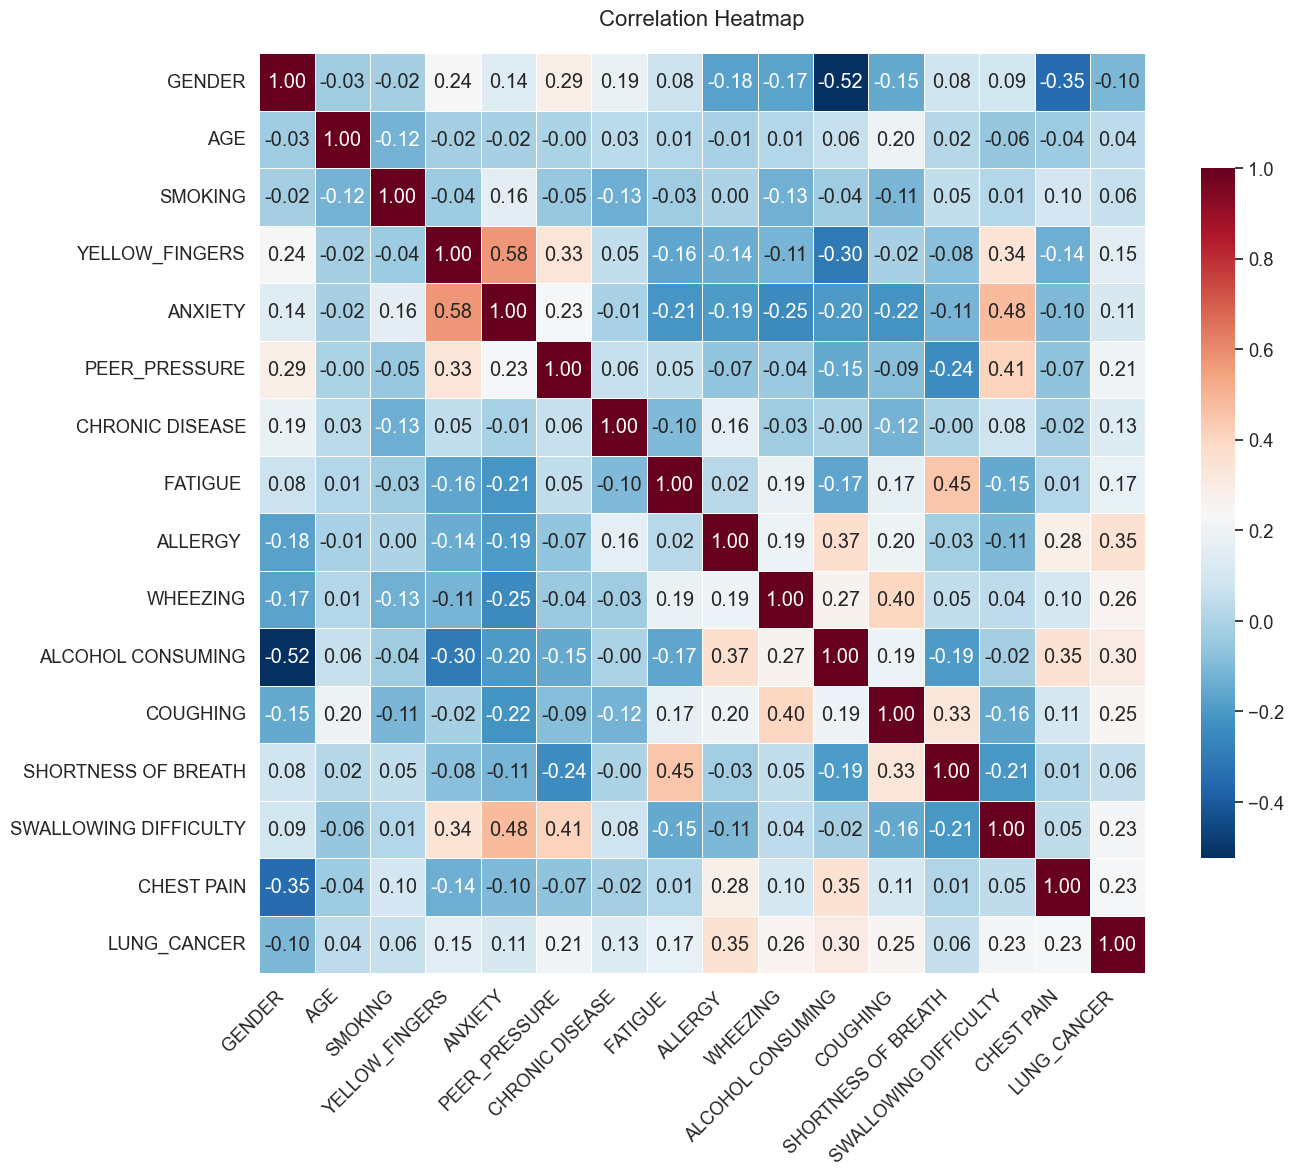

In [70]:
# calculate correlation matrix
corr = df_train.corr()

# adjust heatmap style
plt.figure(figsize=(14, 12))  # increase size
sns.set(font_scale=1.2)       # increase font size

# draw heatmap
heatmap = sns.heatmap(
    corr,
    annot=True,               # numeric display
    fmt=".2f",                # 2 decimal places
    cmap='RdBu_r',          # color theme ('coolwarm', 'viridis', 'YlGnBu', 'RdBu_r')
    linewidths=0.5,           # space between cells
    cbar_kws={"shrink": 0.75} # Small color bar
)

# Setting titles and margins
plt.title("Correlation Heatmap", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  # Layout cleanup
plt.show()

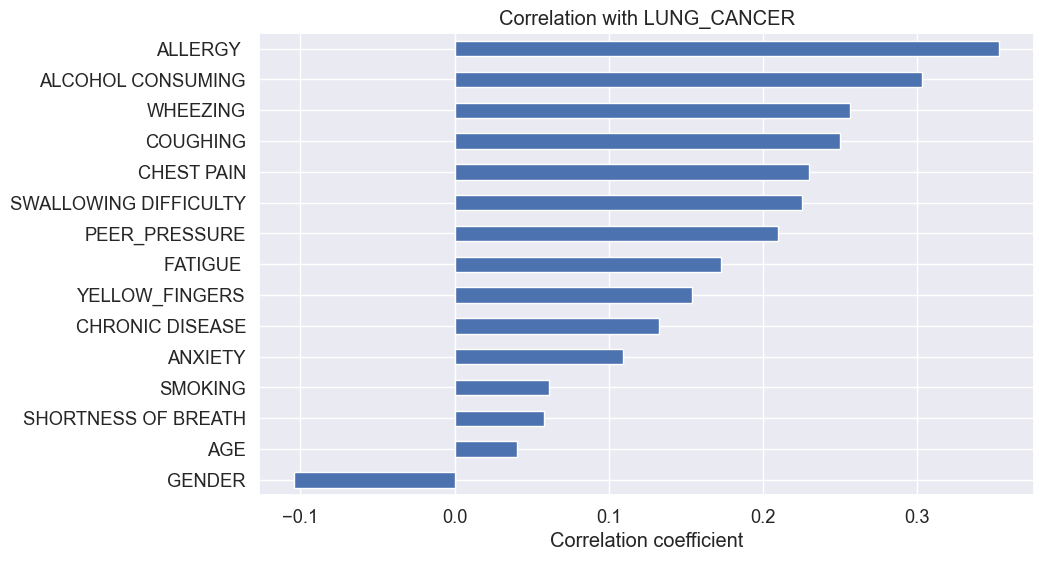

In [71]:
correlation = df_train.corr()['LUNG_CANCER'].drop('LUNG_CANCER')
correlation.sort_values().plot(kind='barh', figsize=(10, 6), title='Correlation with LUNG_CANCER')
plt.xlabel("Correlation coefficient")
plt.show()

In [72]:
print(X.columns)

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
      dtype='object')


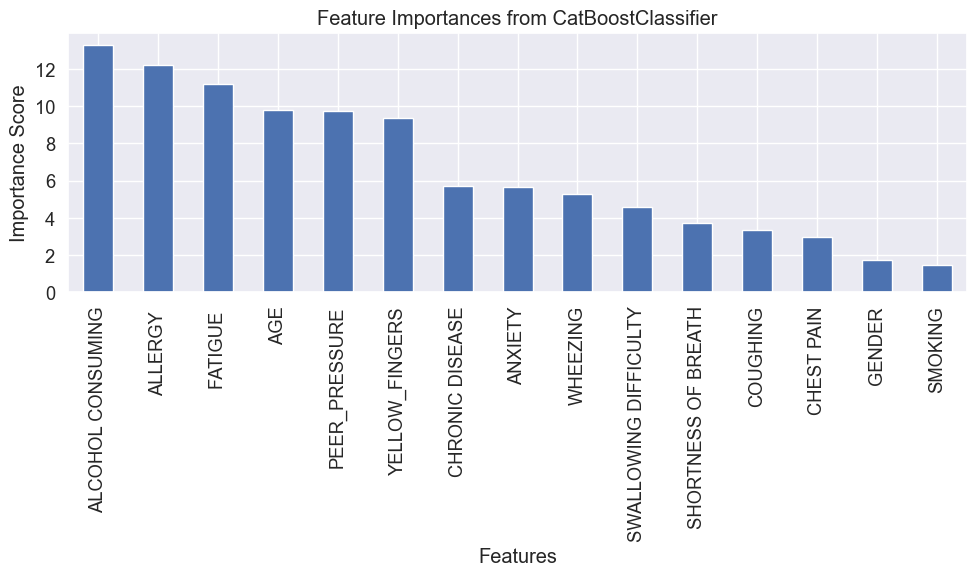

In [73]:
from catboost import CatBoostClassifier, Pool

# 변수의 열 index 추출 (CatBoost는 열 이름이 아니라 index를 요구)
cat_features_idx = [X_train.columns.get_loc(col) for col in categorical]

# 모델 학습
feature_model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    verbose=0,
    random_state=42
)

feature_model.fit(X_train, y_train, cat_features=cat_features_idx)

# Feature Importance 계산
importances = feature_model.get_feature_importance(Pool(X_train, label=y_train, cat_features=cat_features_idx))
importance_series = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
importance_series.plot(kind='bar')
plt.title("Feature Importances from CatBoostClassifier")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.tight_layout()
plt.show()

## Training & evaluation
- Before training and after feature selection, perform SMOTE
- Optimization by tuning model parameters
- Since it is a binary classification problem, the classifier model is considered.

In [74]:
random_state = 42
kf = KFold(n_splits=10, shuffle=True, random_state=random_state)
scoring = "f1"

models = {}

In [75]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score,
                             precision_score, recall_score,
                             precision_recall_curve, auc,
                             balanced_accuracy_score, matthews_corrcoef)
from collections import Counter

# categorical feature 인덱스
categorical_indices = [i for i, col in enumerate(X_train.columns) if col!='AGE']
random_state = 42

# 1. CatBoostClassifier
catboost = CatBoostClassifier(verbose=0, random_state=random_state)

# 2. PIPELINE (SMOTENC + catboost_model)
pipeline = Pipeline([
    ('smote', SMOTENC(categorical_features=categorical_indices, random_state=random_state, k_neighbors=1)),
    ('clf', catboost)
])

# 3. parameter grid (Use clf__ prefix to match model stage)
param_grid = {
    "clf__iterations": [10, 25, 40],
    "clf__depth": [3, 4],
    "clf__learning_rate": [0.01, 0.03],
    "clf__l2_leaf_reg": [3, 5, 10]  # add regulation - to prevent overfitting
}

# 4. Stratified K-Fold
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=random_state)

# 5. GridSearchCV construction/train (SMOTE is applied in CV fold)
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='recall', refit=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 6. testset evaluation
print("Best parameters:", grid_search.best_params_)
print("Best CV score: {:.6f}".format(grid_search.best_score_))

# prediction
y_pred = grid_search.predict(X_test)
y_pred_prob = grid_search.predict_proba(X_test)[:, 1] # for additional matric

print("\nTest Performance")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

# additional matric
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_acc)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall_vals, precision_vals)
print("Precision-Recall AUC (PR-AUC):", pr_auc)

mcc = matthews_corrcoef(y_test, y_pred)
print("Matthews Correlation Coefficient (MCC):", mcc)


Best parameters: {'clf__depth': 4, 'clf__iterations': 25, 'clf__l2_leaf_reg': 3, 'clf__learning_rate': 0.03}
Best CV score: 0.921565

Test Performance
Accuracy: 0.8723404255319149
F1 Score: 0.9230769230769231
Precision: 0.972972972972973
Recall: 0.8780487804878049
ROC AUC: 0.855691056910569
Balanced Accuracy: 0.8556910569105691
Precision-Recall AUC (PR-AUC): 0.986435558319466
Matthews Correlation Coefficient (MCC): 0.5800556122422932


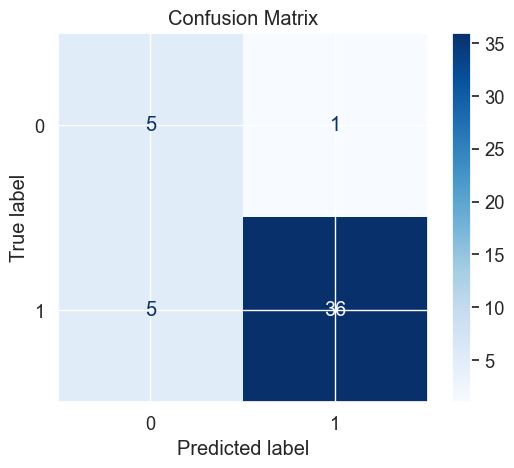

In [76]:
# confusion matric
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')  # 'd' means representing int.
plt.title("Confusion Matrix")
plt.show()

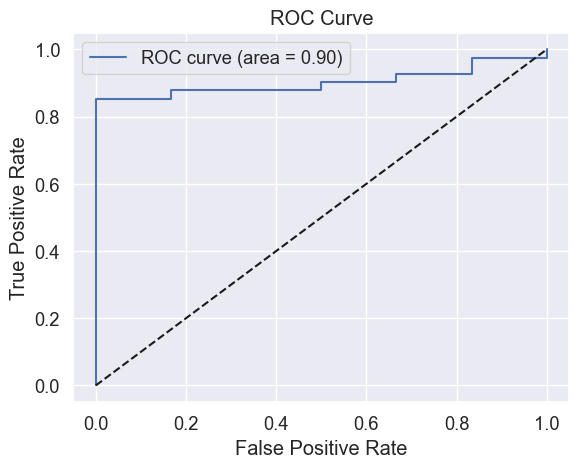

In [77]:
# ROC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # random prediction line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


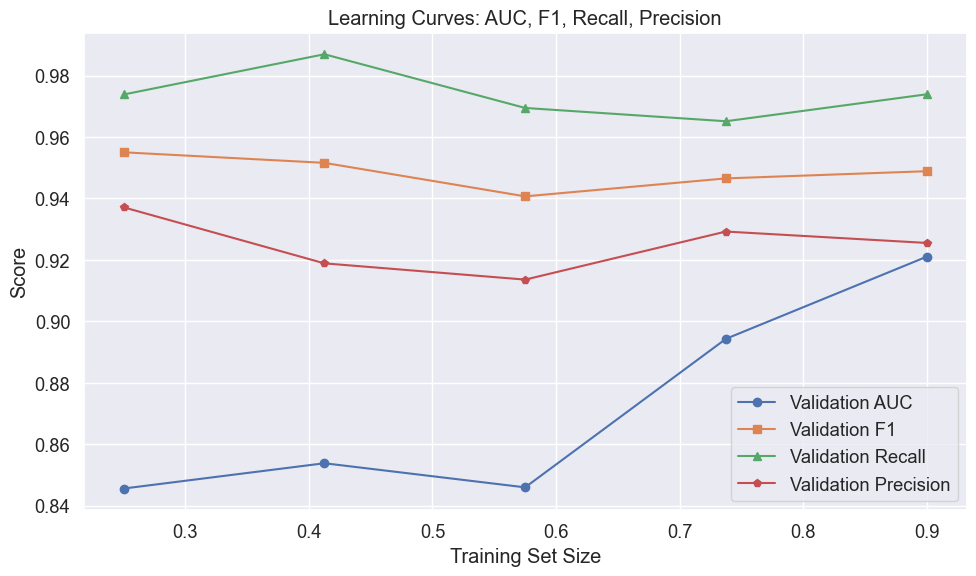

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, learning_curve
from sklearn.metrics import f1_score, roc_auc_score, precision_recall_curve, auc, make_scorer
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline
from catboost import CatBoostClassifier

# common pipeline
pipeline = Pipeline([
    ('smote', SMOTENC(categorical_features=categorical_indices, random_state=random_state)),
    ('clf', CatBoostClassifier(verbose=0, random_state=random_state))
])

# set training size (eliminate too small size)
train_sizes = np.linspace(0.25, 0.9, 5)

# --------- learning rate calculation func ---------
def compute_learning_curve(score_type, scorer):
    return learning_curve(
        pipeline, X_train, y_train,
        train_sizes=train_sizes, cv=3,
        scoring=scorer, n_jobs=-1,
        error_score=np.nan
    )

# calculating learning rate
_, _, val_auc = compute_learning_curve('AUC', 'roc_auc')
_, _, val_f1 = compute_learning_curve('F1', 'f1')
_, _, val_recall = compute_learning_curve('RECALL', 'recall')
_, _, val_precision = compute_learning_curve('PRECISION', 'precision')

# calculate mean values (ignore NaN)
val_auc_mean = np.nanmean(val_auc, axis=1)
val_f1_mean = np.nanmean(val_f1, axis=1)
val_recall_mean = np.nanmean(val_recall, axis=1)
val_precision_mean = np.nanmean(val_precision, axis=1)

# ---------- Plot ----------
plt.figure(figsize=(10, 6))

# AUC
plt.plot(train_sizes, val_auc_mean, 'o-', label='Validation AUC')
# F1
plt.plot(train_sizes, val_f1_mean, 's-', label='Validation F1')
# Recall
plt.plot(train_sizes, val_recall_mean, '^-', label='Validation Recall')
# Precision
plt.plot(train_sizes, val_precision_mean, 'p-', label='Validation Precision')

plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.title("Learning Curves: AUC, F1, Recall, Precision")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


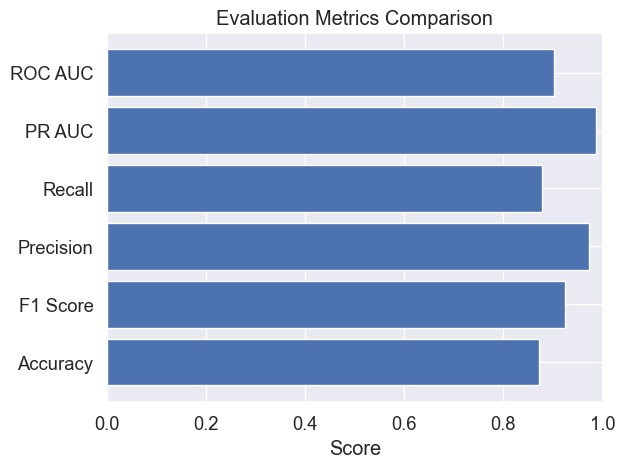

In [79]:
# result visualization
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'PR AUC': pr_auc,
    'ROC AUC': roc_auc_score(y_test, y_pred_prob)
}

plt.barh(list(metrics.keys()), list(metrics.values()))
plt.xlim(0, 1)
plt.xlabel("Score")
plt.title("Evaluation Metrics Comparison")
plt.grid(True, axis='x')
plt.show()

------
Below is the model selection process


In [80]:
"""from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, roc_auc_score
from imblearn.over_sampling import SMOTENC"""

'from sklearn.linear_model import LogisticRegression\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier\nfrom sklearn.neural_network import MLPClassifier\nfrom sklearn.svm import SVC\nfrom xgboost import XGBClassifier\nfrom catboost import CatBoostClassifier\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.metrics import accuracy_score, f1_score, mean_squared_error, roc_auc_score\nfrom imblearn.over_sampling import SMOTENC'

In [81]:
"""# 1. 범주형 feature 인덱스 ('AGE'만 수치형)
categorical_indices = [i for i, col in enumerate(X_train.columns) if col != 'AGE']

# 2. SMOTENC 적용
smote = SMOTENC(categorical_features=categorical_indices, random_state=random_state)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 3. 사용할 모델 및 하이퍼파라미터 정의
model_configs = {
    "Logistic Regression": (
        LogisticRegression(max_iter=1000, random_state=random_state),
        {"C": [0.1, 1.0, 10.0]}
    ),
    "Decision Tree": (
        DecisionTreeClassifier(random_state=random_state),
        {"max_depth": [3, 5, 7]}
    ),
    "Random Forest": (
        RandomForestClassifier(random_state=random_state),
        {"n_estimators": [50, 100], "max_depth": [3, 5, None]}
    ),
    "XGBoost": (
        XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=random_state),
        {"n_estimators": [50, 100], "max_depth": [3, 6], "learning_rate": [0.05, 0.1]}
    ),
    "AdaBoost": (
        AdaBoostClassifier(random_state=random_state),
        {"n_estimators": [50, 100], "learning_rate": [0.05, 0.1]}
    ),
    "MLP": (
        MLPClassifier(max_iter=1000, random_state=random_state),
        {"hidden_layer_sizes": [(50,), (100,)], "alpha": [0.0001, 0.001]}
    ),
    "SVM": (
        SVC(probability=True, random_state=random_state),
        {"C": [0.1, 1.0], "kernel": ["linear", "rbf"]}
    ),
    "Bagging": (
        BaggingClassifier(random_state=random_state),
        {"n_estimators": [10, 50]}
    ),
    "CatBoost": (
        CatBoostClassifier(verbose=0, random_state=random_state),
        {"iterations": [25, 50], "depth": [3, 6], "learning_rate": [0.05, 0.1]}
    )
}"""

'# 1. 범주형 feature 인덱스 (\'AGE\'만 수치형)\ncategorical_indices = [i for i, col in enumerate(X_train.columns) if col != \'AGE\']\n\n# 2. SMOTENC 적용\nsmote = SMOTENC(categorical_features=categorical_indices, random_state=random_state)\nX_resampled, y_resampled = smote.fit_resample(X_train, y_train)\n\n# 3. 사용할 모델 및 하이퍼파라미터 정의\nmodel_configs = {\n    "Logistic Regression": (\n        LogisticRegression(max_iter=1000, random_state=random_state),\n        {"C": [0.1, 1.0, 10.0]}\n    ),\n    "Decision Tree": (\n        DecisionTreeClassifier(random_state=random_state),\n        {"max_depth": [3, 5, 7]}\n    ),\n    "Random Forest": (\n        RandomForestClassifier(random_state=random_state),\n        {"n_estimators": [50, 100], "max_depth": [3, 5, None]}\n    ),\n    "XGBoost": (\n        XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=random_state),\n        {"n_estimators": [50, 100], "max_depth": [3, 6], "learning_rate": [0.05, 0.1]}\n    ),\n    "AdaBoost": (\n   

In [82]:
""""# 4. 모델 학습, 평가, 저장
for name, (model, param_grid) in model_configs.items():
    print(f"\n=== {name} ===")

    # GridSearchCV 설정
    if name == "CatBoost":
        grid = GridSearchCV(model, param_grid, cv=kf, scoring=scoring, refit=True, n_jobs=-1)
        grid.fit(X_resampled, y_resampled, cat_features=categorical_indices)
    else:
        grid = GridSearchCV(model, param_grid, cv=kf, scoring=scoring, refit=True, n_jobs=-1)
        grid.fit(X_resampled, y_resampled)

    best_model = grid.best_estimator_
    models[name] = best_model

    y_pred = best_model.predict(X_test)

    print("Best parameters:", grid.best_params_)
    print("Best CV score: {:.6f}".format(grid.best_score_))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1:", f1_score(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_pred)) """

'"# 4. 모델 학습, 평가, 저장\nfor name, (model, param_grid) in model_configs.items():\n    print(f"\n=== {name} ===")\n\n    # GridSearchCV 설정\n    if name == "CatBoost":\n        grid = GridSearchCV(model, param_grid, cv=kf, scoring=scoring, refit=True, n_jobs=-1)\n        grid.fit(X_resampled, y_resampled, cat_features=categorical_indices)\n    else:\n        grid = GridSearchCV(model, param_grid, cv=kf, scoring=scoring, refit=True, n_jobs=-1)\n        grid.fit(X_resampled, y_resampled)\n\n    best_model = grid.best_estimator_\n    models[name] = best_model\n\n    y_pred = best_model.predict(X_test)\n\n    print("Best parameters:", grid.best_params_)\n    print("Best CV score: {:.6f}".format(grid.best_score_))\n    print("Accuracy:", accuracy_score(y_test, y_pred))\n    print("F1:", f1_score(y_test, y_pred))\n    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))\n    print("ROC AUC:", roc_auc_score(y_test, y_pred)) '